# Analysis measuring dispersion

## Import libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("creditcard.csv")

# Display of first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Calculating mean, median and standard deviation for each attribute

In [4]:
import pandas as pd

def calculate_stats(df):

    
    # Select only the PCA columns (V1 to V28) and the 'Amount' column
    columns_to_calculate = [col for col in df.columns if col.startswith('V') or col == 'Amount']
    
    # Calculate the statistics and round to 2 decimal places
    stats = pd.DataFrame({
        'Mean': df[columns_to_calculate].mean().round(2),
        'Median': df[columns_to_calculate].median().round(2),
        'Variance': df[columns_to_calculate].var().round(2),
        'Standard Deviation': df[columns_to_calculate].std().round(2),
        'IQR': (df[columns_to_calculate].quantile(0.75) - df[columns_to_calculate].quantile(0.25)).round(2)
        
    })
    
    return stats

In [5]:
print(calculate_stats(df))

         Mean  Median  Variance  Standard Deviation    IQR
V1       0.00    0.02      3.84                1.96   2.24
V2       0.00    0.07      2.73                1.65   1.40
V3      -0.00    0.18      2.30                1.52   1.92
V4       0.00   -0.02      2.00                1.42   1.59
V5       0.00   -0.05      1.91                1.38   1.30
V6       0.00   -0.27      1.77                1.33   1.17
V7      -0.00    0.04      1.53                1.24   1.12
V8       0.00    0.02      1.43                1.19   0.54
V9      -0.00   -0.05      1.21                1.10   1.24
V10      0.00   -0.09      1.19                1.09   0.99
V11      0.00   -0.03      1.04                1.02   1.50
V12     -0.00    0.14      1.00                1.00   1.02
V13      0.00   -0.01      0.99                1.00   1.31
V14      0.00    0.05      0.92                0.96   0.92
V15      0.00    0.05      0.84                0.92   1.23
V16      0.00    0.07      0.77                0.88   0.

## Visulization

In [14]:
def plot_hist(df):

    sns.set_theme(style="whitegrid")
    
    columns = [col for col in df.columns if col.startswith("V") or col == "Amount" or col =="Time"]  # Selecting the columns from V1-V28 and "Amount"

    # Format subplot grid
    num_cols = 3
    num_rows = (len(columns) + num_cols - 1) // 3

    # Creating the subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize = (16, 45))  
    axes = axes.flatten()


    for i, col in enumerate(columns):

        
        # Calculating mean and median
        mean = df[col].mean()  
        median = df[col].median()
        sd = df[col].std()

        # Plotting histogram
        axes[i].hist(df[col], bins=50, color="darkslateblue", edgecolor="white", alpha=0.7)

        # Graphing the mean and the median
        axes[i].axvline(mean, color="red", linestyle="dashed", linewidth=2, label=f"Mean {mean:.2f}")
        axes[i].axvline(median, color='green', linestyle="dashed", linewidth=2, label=f'Median {median:.2f}')
        axes[i].axvline(label=f"STD {sd:.2f}")

        # Labels
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].legend()

    # Remove extra axis
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

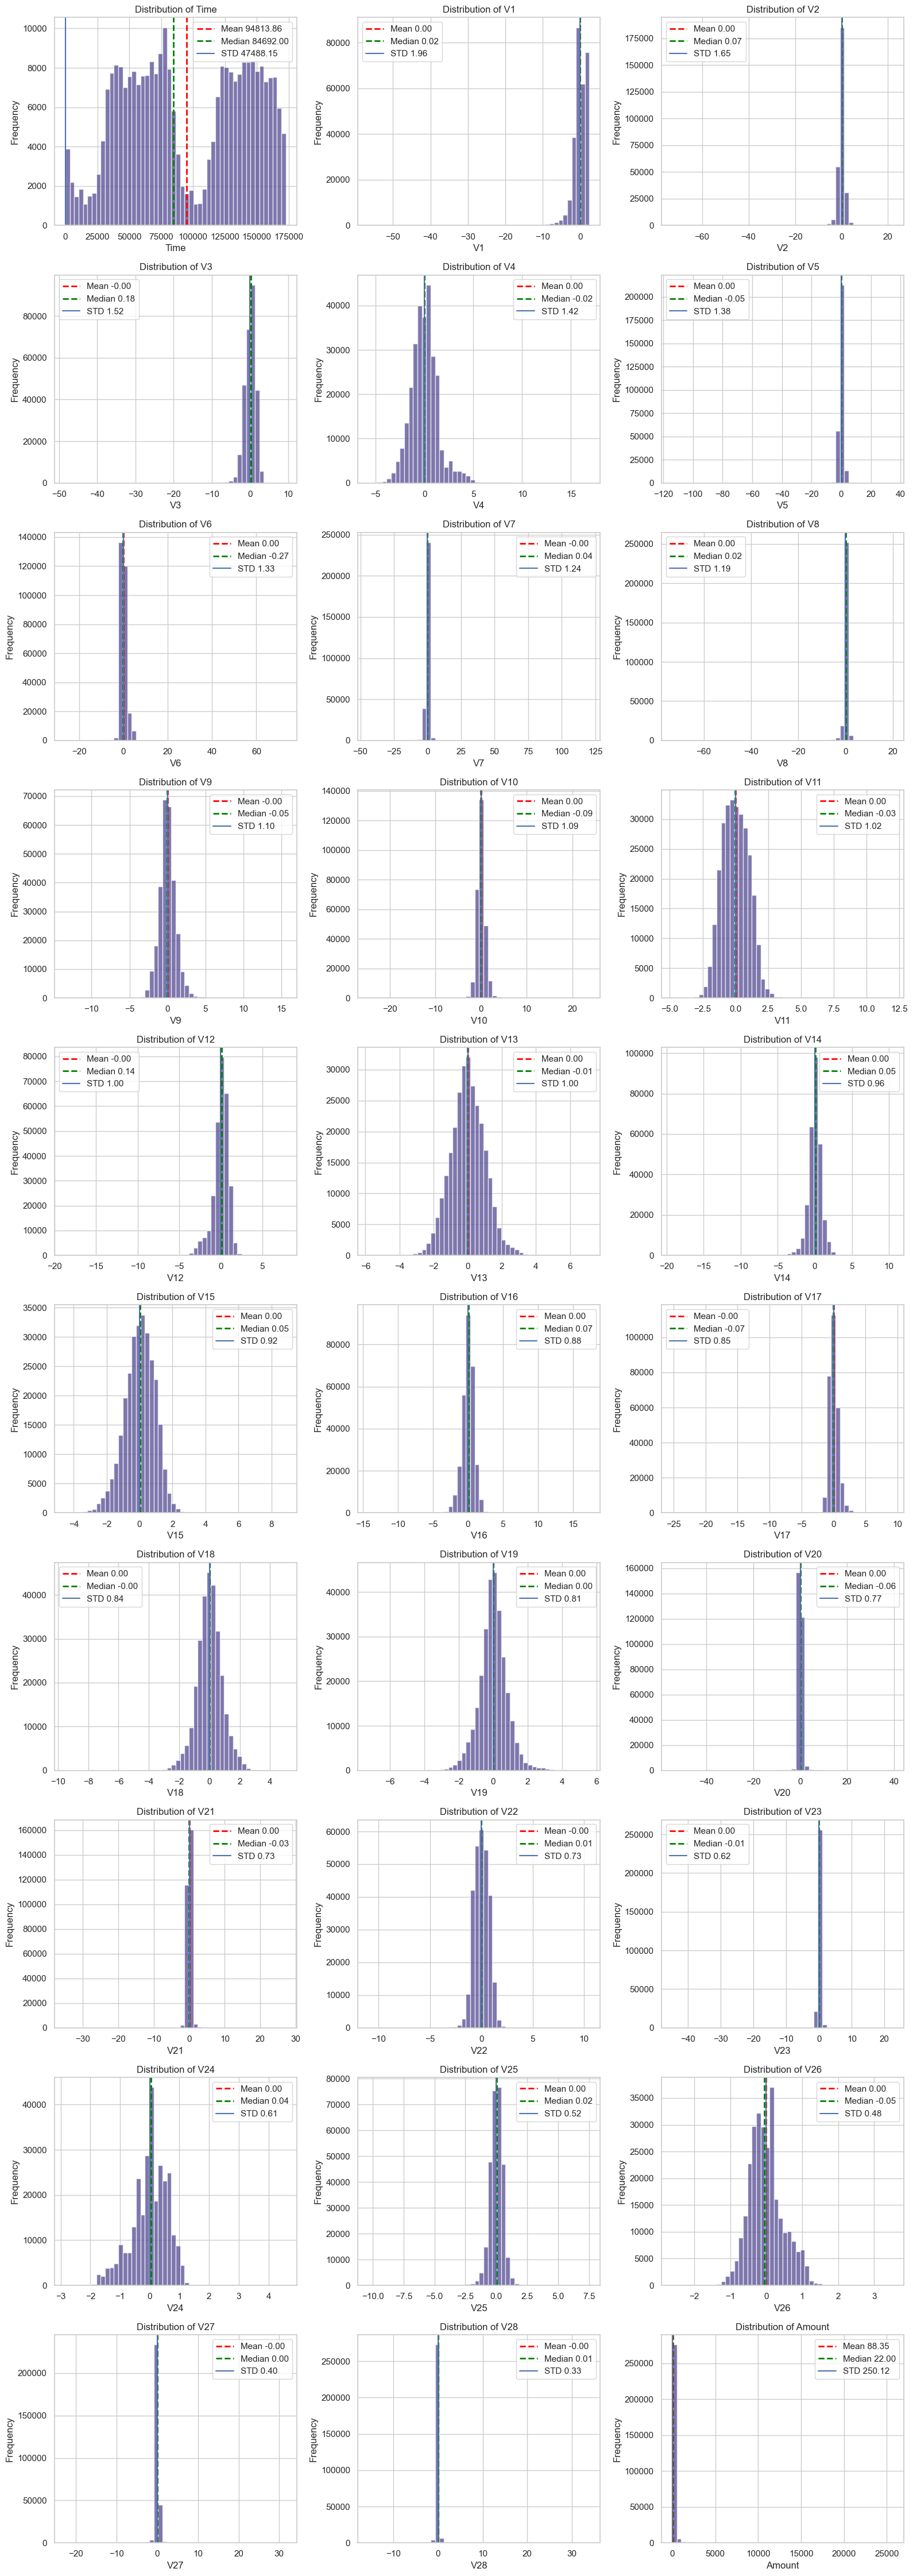

In [15]:
plot_hist(df)

## Visulization boxplot

In [16]:
def plot_box(df):

    sns.set_theme(style="whitegrid")

    columns = [col for col in df.columns if col.startswith("V") or col == "Amount" or col =="Time"]  # Selecting the columns from V1-V28 and "Amount"

    # Format subplot grid
    num_cols = 3
    num_rows = (len(columns) + num_cols - 1) // 3

    # Creating the subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize = (20, 60))  
    axes = axes.flatten()

    for i, col in enumerate(columns):


        # Plot the current column
        sns.boxplot(data=df, x="Class", y=col, ax=axes[i])

        
        # Labels
        axes[i].set_title(f"Boxplot of {col}")
        axes[i].set_xlabel("Class")
        axes[i].set_ylabel(col)


    # Remove extra axis
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)


    # Adjust the layout
    plt.tight_layout()
    plt.show()    

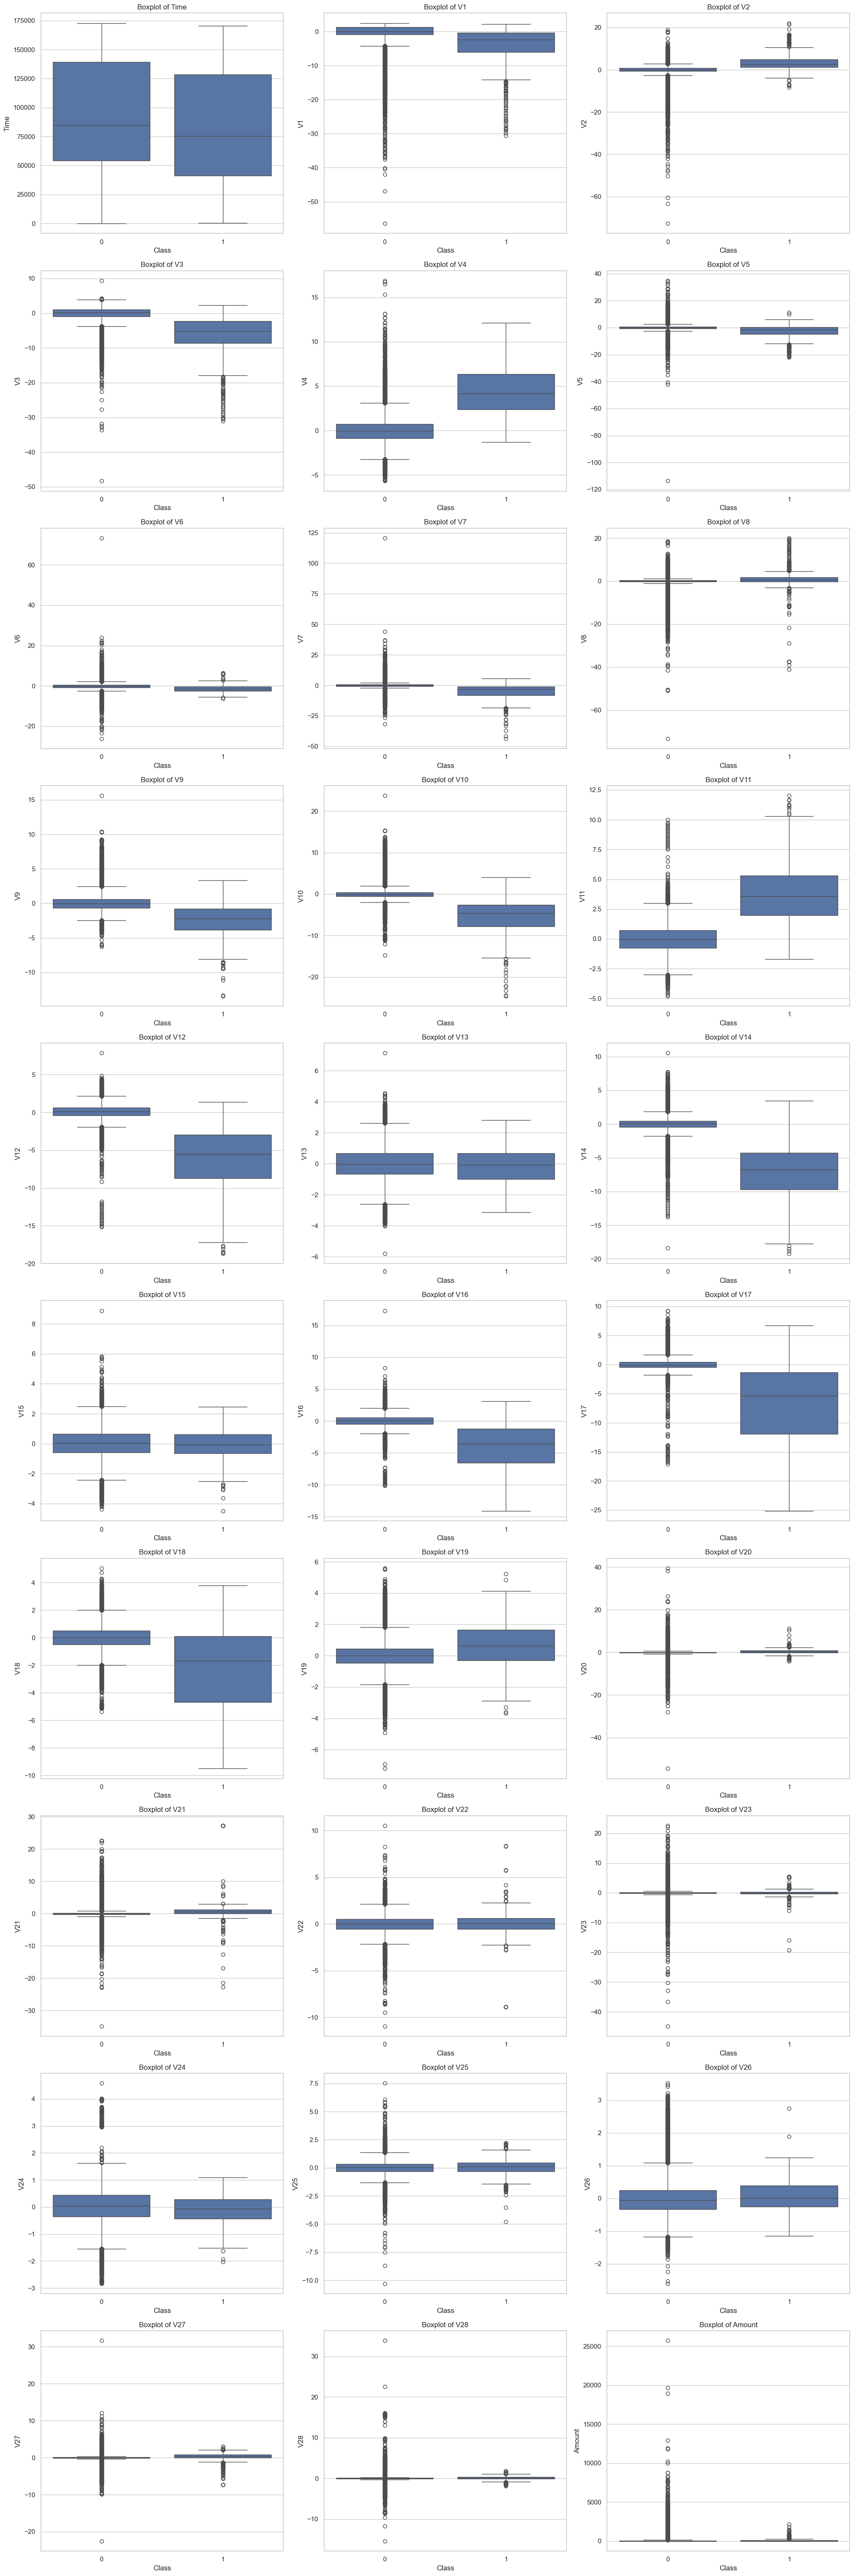

In [17]:
plot_box(df)